# Analyse des datasets

### Démarche
1. Création d'un graph de l'organisation des jeux de données entre eux
2. Analyse globale des jeux de données et de leurs features
3. Émission des premières hypothèses sur les features à garder


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["customers", "geolocation", "order_items", "order_payments", "order_reviews", "orders", "products", "sellers"])
G.add_edges_from([("customers", "geolocation", {"label": "zipcode"}),
                ("customers", "orders", {"label": "customer_id"}),
                ("geolocation", "sellers", {"label": "zipcode"}),
                ("order_items", "sellers", {"label": "seller_id"}),
                ("order_items", "orders", {"label": "order_id"}),
                ("order_items", "products", {"label": "product_id"}),
                ("order_payments", "orders", {"label": "order_id"}),
                ("order_reviews", "orders", {"label": "order_id"})])

{('customers',
  'geolocation'): Text(-0.5954778342983598, -0.23538400350229466, 'zipcode'),
 ('customers',
  'orders'): Text(-0.04402669493973271, -0.31529185945003524, 'customer_id'),
 ('geolocation',
  'sellers'): Text(-0.7179295335289417, 0.14727457233045924, 'zipcode'),
 ('order_items',
  'sellers'): Text(-0.30243771471635034, 0.40538733173544805, 'seller_id'),
 ('order_items',
  'orders'): Text(0.13389869500053234, 0.08806081835782974, 'order_id'),
 ('order_items',
  'products'): Text(0.07927154054645345, 0.7130407168552796, 'product_id'),
 ('order_payments',
  'orders'): Text(0.3793153595922647, -0.5326268686831628, 'order_id'),
 ('order_reviews',
  'orders'): Text(0.5732273438765244, -0.2623563580474404, 'order_id')}

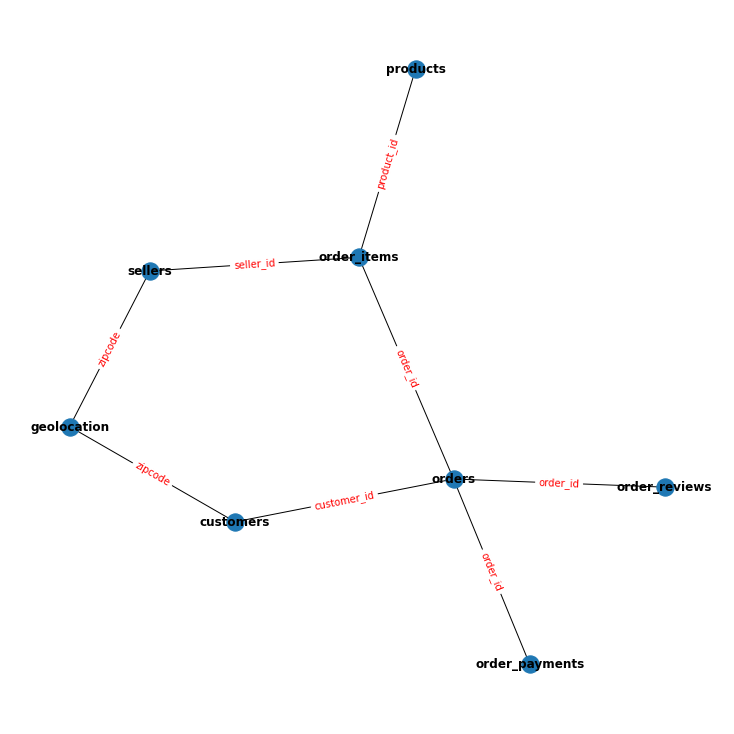

In [2]:
fig = plt.figure(figsize=(10, 10))

# format edge labels
edge_labels = nx.get_edge_attributes(G, "label")
# print(edge_labels)

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels= True, font_weight= "bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

In [3]:
pd.set_option("display.max_columns", None)

customers_datas = pd.read_csv("olist_customers_dataset.csv")
geolocation_datas = pd.read_csv("olist_geolocation_dataset.csv")
order_items_datas = pd.read_csv("olist_order_items_dataset.csv", parse_dates=[4])
order_payments_datas = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews_datas = pd.read_csv("olist_order_reviews_dataset.csv", parse_dates=[5,6])
orders_datas = pd.read_csv("olist_orders_dataset.csv", parse_dates=[3, 4, 5, 6, 7])
products_datas = pd.read_csv("olist_products_dataset.csv")
sellers_datas = pd.read_csv("olist_sellers_dataset.csv")

### Données des clients

Données liées à la table "Orders" par la feature "custumer_id" et à "Geolocation" par "zipcode"

In [4]:
print(f"Nb d'individus: {len(customers_datas)}")

customers_datas.head(10)

Nb d'individus: 99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


Hypothèse:
1. Étant donné qu'il existe une feature nommée "customer_unique_id" et une nommée "customer_id", on peut supposer que "customer_unique_id" représente le numéro du client dans la base de données alors que "custumer_id" est l'identifiant du client pour une commande spécifique vu que cette feature sert de clé secondaire dans la table "Orders". Chaque commande étant unique, "customer_id" devrait être unique aussi alors que des doublons devraient apparaîtrent dans "customer_unique_id" dans le cas où un client a passé plus de une commande. L'hypothèse peut être validée avec la fonction value_counts sur chacune des features. Si c'est le cas, il suffira de remplacer les valeurs de la feature "customer_id" de la table "Order" par "customer_unique_id" pour retrouver toutes les commandes passées par client et ainsi limiter l'anonymisation.
2. En associant le "zipcode" à "customer_id" dans la table "Orders", on devrait pouvoir mettre en avant plusieurs éléments en fonction des régions et des données tirées des autres datasets.

### Hypothèse 1

In [5]:
print("Customer_id: ", customers_datas["customer_id"].value_counts()[:10])
print("\n")
print("Customer_unique_id: ", customers_datas["customer_unique_id"].value_counts()[:10])

Customer_id:  06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
8cd118ecfb9703463ef9670b1d18a26e    1
8b7369c82ac3d8d71b77d5b23b085696    1
4b7decb9b58e2569548b8b4c8e20e8d7    1
a30378a29ac174b9a1a158ce067e1fd2    1
1d99b48c0fe6d0bc50feebecdc88cbc2    1
Name: customer_id, dtype: int64


Customer_unique_id:  8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
63cfc61cee11cbe306bff5857d00bfe4     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
de34b16117594161a6a89c50b289d35a     6
dc813062e0fc23409cd255f7f53c7074     6
Name: customer_unique_id, dtype: int64


L'hypothèse 1 est confirmée

### Données de Géolocalisation

Données liées aux tables "Customer" et "Seller" par la feature "zipcode"

In [6]:
print(f"Nb d'individus: {len(geolocation_datas)}")

geolocation_datas.head(10)

Nb d'individus: 1000163


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


Observations:
* Apparemment, il y a des doublons dans les zipcodes
* À première vue cette table ne me servira pas sauf si je découvre des profils clients spécifiques à une localisation et que je souhaite afficher ces clusters sur une carte.

### Données des produits commandés

Données liées aux tables "Orders", "Sellers" et "Products" respectivement par les features "order_id", "seller_id" et "product_id"

In [7]:
print(f"Nb d'individus: {len(order_items_datas)}")

order_items_datas.head(10)

Nb d'individus: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


Hypothèses:
1. On peut limiter l'anonymisation des produits en remplaçant la feature "product_id" par la catégorie du produit affichée dans la table "Products".
2. On peut aussi ajouter la longueur des descriptions et le nombre de photos du produit pour voir si ça impacte le client.
3. On peut limiter l'anonymisation des vendeurs en remplaçant "seller_id" par le "zipcode" de la table "Sellers".
4. Ainsi, en corrélant la localisation de l'acheteur et du vendeur, on peut voir si ça impacte les délais de livraison et les frais de port et donc le choix du client.

### Données des paiements des commandes

Données liées à "Orders" par la feature "order_id"

In [8]:
print(f"Nb d'individus: {len(order_payments_datas)}")

order_payments_datas.head(10)

Nb d'individus: 103886


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


Je ne suis pas trop sûr de ce que je peux tirer de cette table.

Hypothèses:
1. Impact des facilités de paiements
2. Repartition des clients selon leurs revenus

### Données des avis clients

Données liées à "Orders" par la feature "order_id"

In [9]:
print(f"Nb d'individus: {len(order_reviews_datas)}")

order_reviews_datas.head(10)

Nb d'individus: 100000


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47


Hypothèses:
1. Les notes sont associées à des commandes. Possibilité de lier ces notes à un client donné pour une commande et donc susceptiblement pour un porduit donné.

### Données des commandes

Données liées aux tables "Customers", "Order_items", "Order_payments" et "Order_reviews" par la feature "customer_id" pour "Customers" et "order_id" pour les autres.

In [10]:
print(f"Nb d'individus: {len(orders_datas)}")

orders_datas.head(10)

Nb d'individus: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


Hypothèses:
1. Je peux me baser sur la feature "order_purchase_timestamp" pour mettre en avant les fluctuations d'achats en fonction d'une période.
2. Je peux aussi me baser sur cette feature pour définir la fréquence à laquelle la segmentation doit être mise à jour.

### Données des produits

Données liées à la table "Order_items" par la feature "product_id"

In [11]:
print(f"Nb d'individus: {len(products_datas)}")

products_datas.head(10)

Nb d'individus: 32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


Observations:
* Traduire les catégories de produits avec le fichier mis à disposition

### Données des vendeurs

Données liées aux tables "Geolocation" et "Order_items" par les features "zipcode" et "seller_id"

In [12]:
print(f"Nb d'individus: {len(sellers_datas)}")

sellers_datas.head(10)

Nb d'individus: 3095


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR
